# YOLO-object-detection_1




## Importing Some Basic Libraries

In [18]:
import numpy as np 
import cv2
import pandas as pd 
from matplotlib import pyplot as plt

## Importing the Dataset

In [19]:
yolo = cv2.dnn.readNet("yolov3.weights" , "yolov3.cfg.txt")

## Showing the Dataset in a Table

In [20]:
classes = []

with open("coco.names.txt", 'r') as f:
    classes = f.read().splitlines()

In [21]:
len(classes)

80

In [22]:
pd.DataFrame(classes)

,0
0,person
1,bicycle
2,car
3,motorbike
4,aeroplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


## Preprocessing image uploaded (OPCV)

In [23]:
img = cv2.imread("car-1.jpg")
# reshape image to fit while swapping RG to RB
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False )

In [24]:
blob.shape

(1, 3, 320, 320)

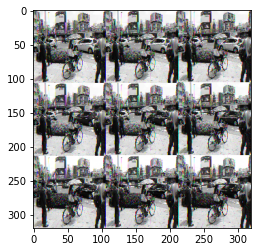

In [25]:
#to print image you need only 3 channels

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [ ]:
#set input image and define output layer names

In [26]:
yolo.setInput(blob)

output_layers_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_names)

In [ ]:
#find bounding boxes and put them on the image

In [34]:
boxes = []
confidence = []
class_ids = []
height, width, _ = img.shape


for output in layeroutput:
    #detection gives us a list, and the score will find the array that has the maximum probablilty of that image,
    #class_ids will return the value of whatever the probability is
    for detection in output:
        #first four boxes in detection return X,Y,width and height
        score = detection [5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        #in order to prevent multiple bounding boxes
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidence.append(float(confidence))
            class_ids.append(class_id)

AttributeError: 'numpy.float32' object has no attribute 'append'